AAI 530 Mod 7 Assignment

Sanjay Kumar

Feb 2025

In [80]:
# Github link:

In [81]:
# Tableau link:

#------------ Uber dataset analysis --------------

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler




# Define file paths
uber_files = [
    "/content/sample_data/uber-raw-data-apr14.csv", "/content/sample_data/uber-raw-data-may14.csv",
    "/content/sample_data/uber-raw-data-jun14.csv", "/content/sample_data/uber-raw-data-jul14.csv",
    "/content/sample_data/uber-raw-data-aug14.csv", "/content/sample_data/uber-raw-data-sep14.csv"
]

# Merge dataset
df_list = [pd.read_csv(file) for file in uber_files]
df = pd.concat(df_list, ignore_index=True)
merged_file_path = "/content/sample_data/uber-raw-data-aprsep-14.csv"
df.to_csv(merged_file_path, index=False)

# Read merged dataset
df = pd.read_csv(merged_file_path)

# Inspect dataset
print("First 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nDataset statistics:")
print(df.describe())

# Convert Date/Time to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')
print("\nUpdated Data Types:")
print(df.dtypes)

# Create a copy for cleaning
df_clean = df.copy()

# Explore dataset
print("\nMissing values:")
print(df_clean.isnull().sum())
print("\nDuplicates:", df_clean.duplicated().sum())

# Clean dataset
# Drop rows with missing values
df_clean.dropna(inplace=True)
# Remove duplicates
df_clean.drop_duplicates(inplace=True)

# Save clean dataset
clean_file_path = "/content/sample_data/uber-raw-data-aprsep-14-clean.csv"
df_clean.to_csv(clean_file_path, index=False)

print("\nClean dataset saved successfully!")

# Inspect clean dataset
print("First 5 rows:")
print(df_clean.head())
print("\nData types:")
print(df_clean.dtypes)
print("\nDataset statistics:")
print(df_clean.describe())


First 5 rows:
          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

Data types:
Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

Dataset statistics:
                Lat           Lon
count  4.534327e+06  4.534327e+06
mean   4.073926e+01 -7.397302e+01
std    3.994991e-02  5.726670e-02
min    3.965690e+01 -7.492900e+01
25%    4.072110e+01 -7.399650e+01
50%    4.074220e+01 -7.398340e+01
75%    4.076100e+01 -7.396530e+01
max    4.211660e+01 -7.206660e+01

Updated Data Types:
Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

Missing values:
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

Duplicates: 82581

Clean dataset s

--------------- Cleaned Uber dataset usage:-----------------

In [83]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#----------------- Time Series Analysis -------------

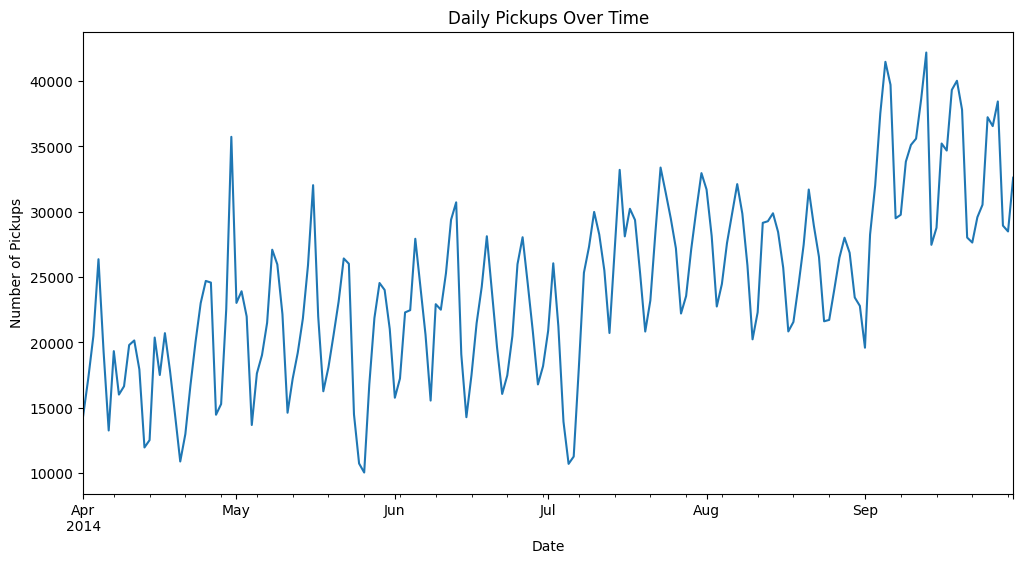

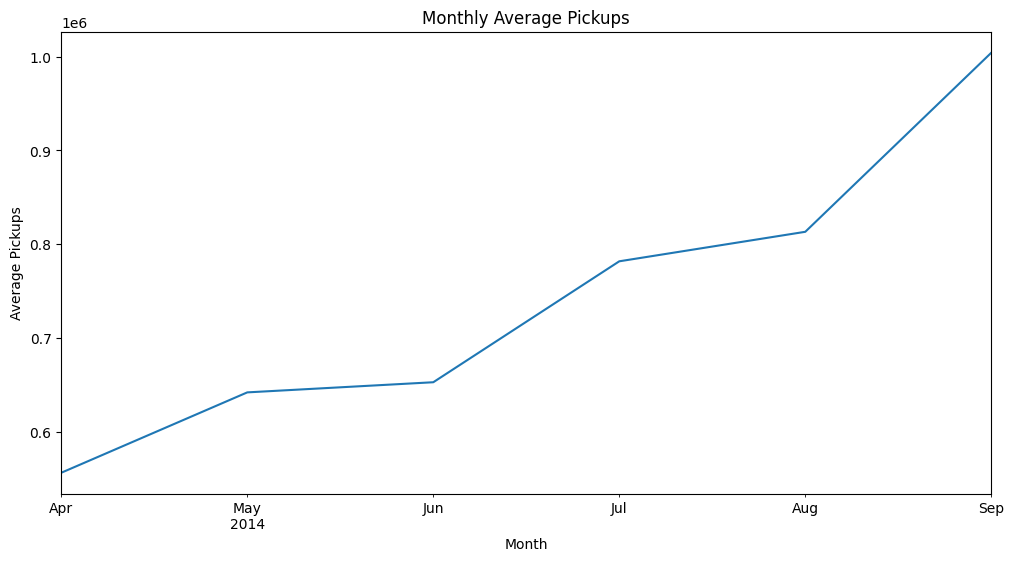

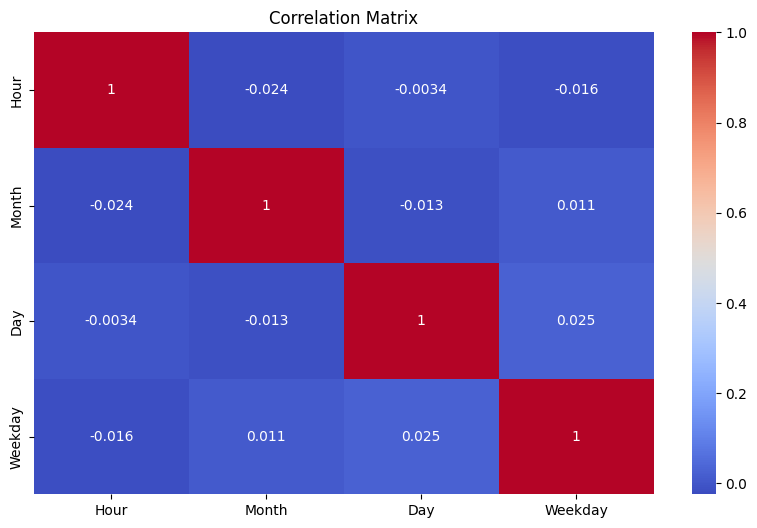

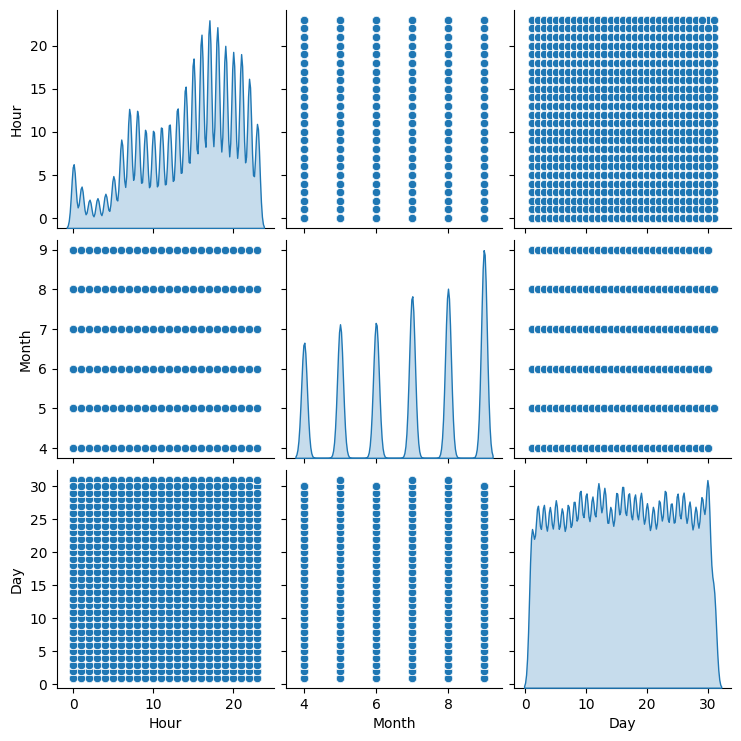

In [84]:
# ----------------- Time Series Analysis -----------------

# Extract time-based features
df_clean['Year'] = df_clean['Date/Time'].dt.year
df_clean['Month'] = df_clean['Date/Time'].dt.month
df_clean['Day'] = df_clean['Date/Time'].dt.day
df_clean['Hour'] = df_clean['Date/Time'].dt.hour
df_clean['Weekday'] = df_clean['Date/Time'].dt.weekday
df_clean['Weekend'] = df_clean['Weekday'] >= 5

# Visualize data over time - Daily Pickups Over Time
plt.figure(figsize=(12, 6))
df_clean.resample('D', on='Date/Time').size().plot()
plt.title('Daily Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.show()

# Compute monthly averages
monthly_avg = df_clean.resample('ME', on='Date/Time').size()

# Visualize monthly averages - Monthly Average Pickups
plt.figure(figsize=(12, 6))
monthly_avg.plot()
plt.title('Monthly Average Pickups')
plt.xlabel('Month')
plt.ylabel('Average Pickups')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[['Hour', 'Month', 'Day', 'Weekday']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots
sns.pairplot(df_clean[['Hour', 'Month', 'Day']], diag_kind='kde')
plt.show()

#--------------Peak hour Analysis ---------------

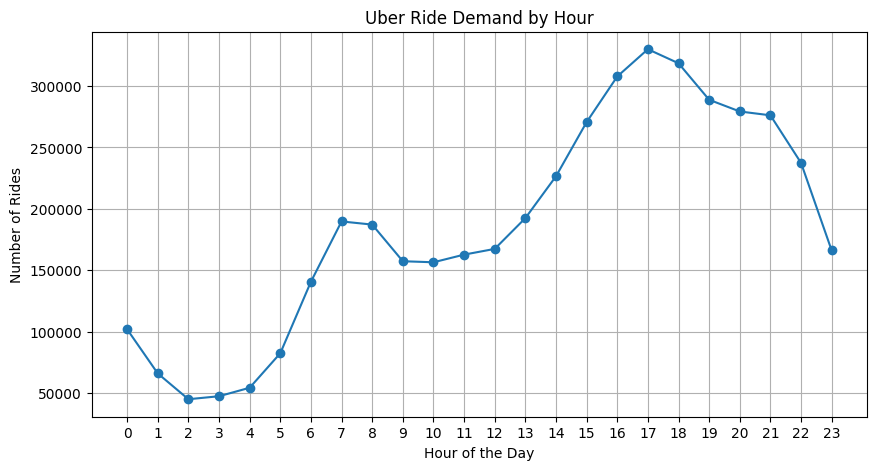

In [85]:
#------------------ Find peak hours ----------------
#import pandas as pd
#import matplotlib.pyplot as plt

# Load dataset
df_clean = pd.read_csv("/content/sample_data/uber-raw-data-aprsep-14-clean.csv")

# Convert Date/Time column to datetime format
df_clean['Date/Time'] = pd.to_datetime(df_clean['Date/Time'])

# Extract hour from Date/Time
df_clean['Hour'] = df_clean['Date/Time'].dt.hour

# Aggregate ride counts by hour
hourly_rides = df_clean.groupby('Hour').size()

# Plot the ride demand per hour
plt.figure(figsize=(10, 5))
plt.plot(hourly_rides.index, hourly_rides.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Uber Ride Demand by Hour')
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid()
plt.show()


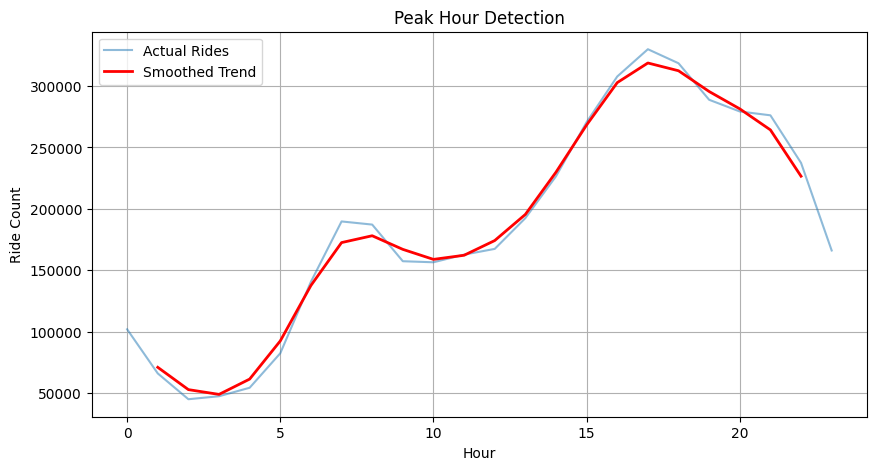

In [86]:
# Apply a rolling average to smooth fluctuations
hourly_rides_smoothed = hourly_rides.rolling(window=3, center=True).mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(hourly_rides.index, hourly_rides.values, label='Actual Rides', alpha=0.5)
plt.plot(hourly_rides.index, hourly_rides_smoothed, label='Smoothed Trend', color='red', linewidth=2)
plt.xlabel('Hour')
plt.ylabel('Ride Count')
plt.legend()
plt.title('Peak Hour Detection')
plt.grid()
plt.show()


In [87]:
#import numpy as np

# Compute threshold for peak hours
threshold = hourly_rides.mean() + hourly_rides.std()

# Identify peak hours
peak_hours = hourly_rides[hourly_rides > threshold].index.tolist()
print("Identified Peak Hours:", peak_hours)


Identified Peak Hours: [16, 17, 18, 19, 20, 21]


-----------End of  Identified Peak Hours ------------------

#------------- Random Forest Regressor Model----

Identified Peak Hours: [16, 17, 18, 19, 20, 21]


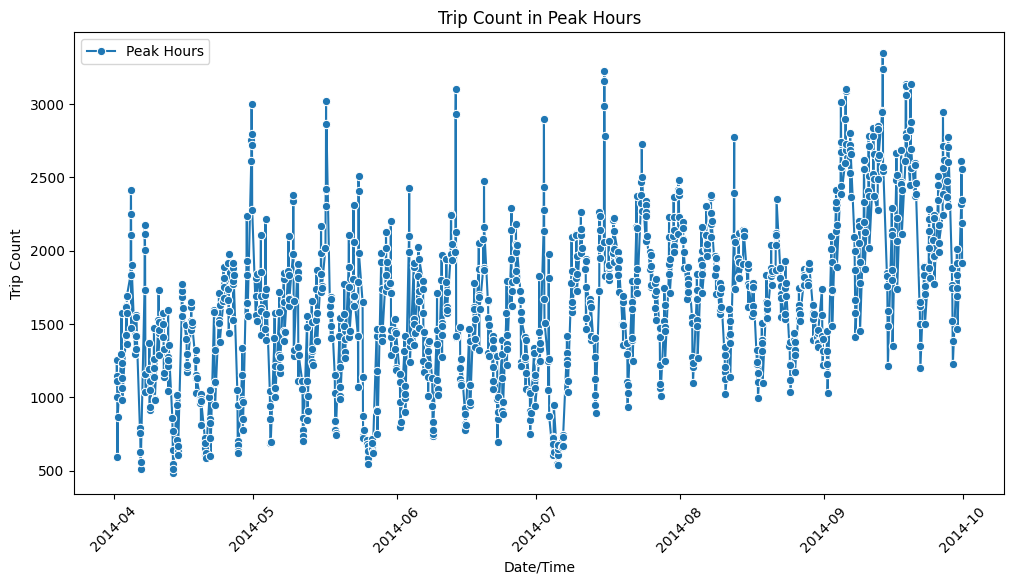

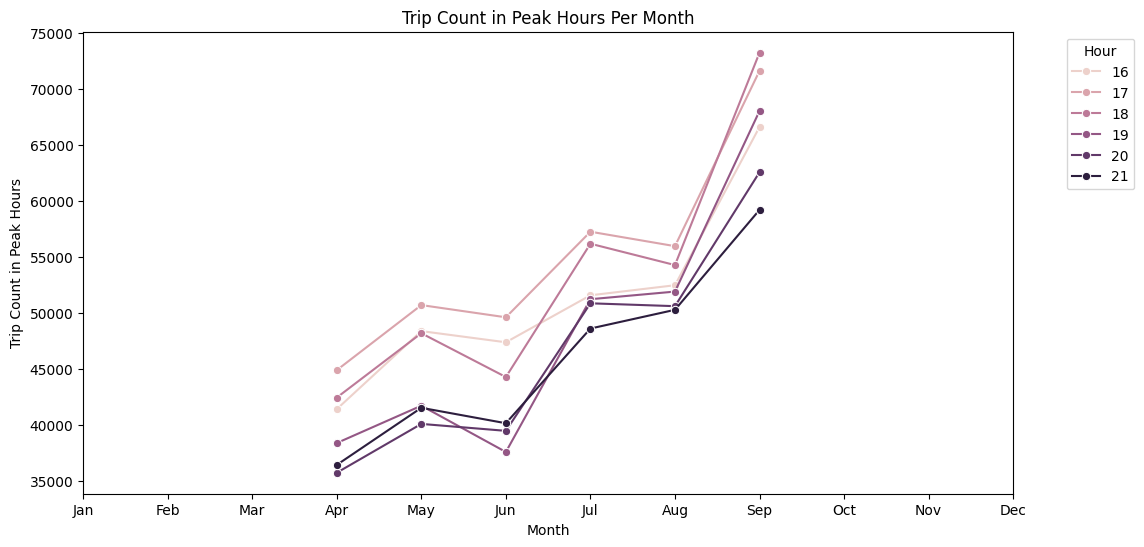

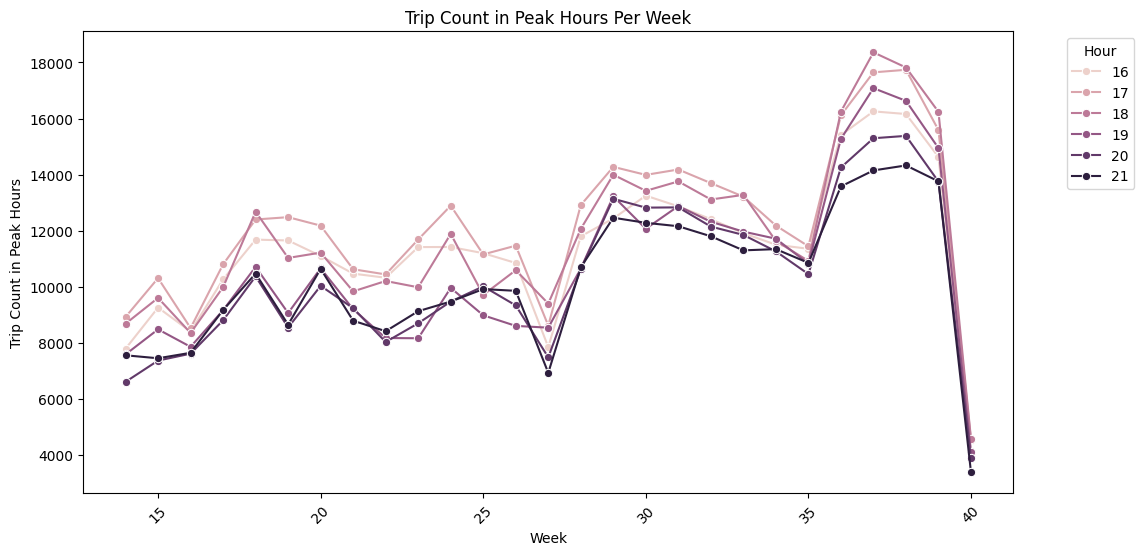

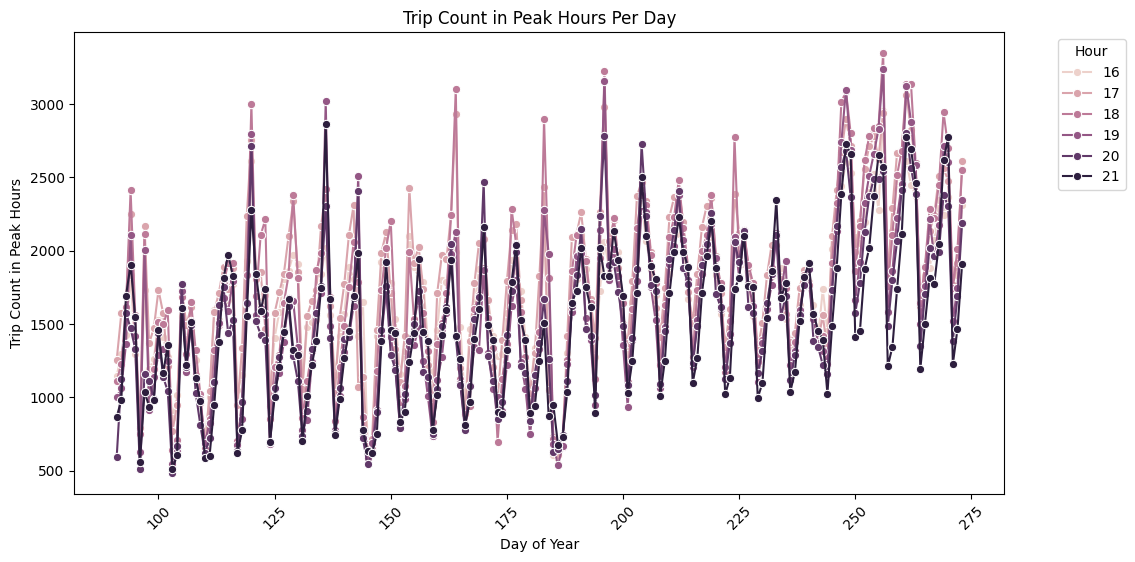

<ipython-input-88-93ea2984d69d>:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=peak_hour_hourly, x='Hour', y='Trip_Count', palette='viridis')


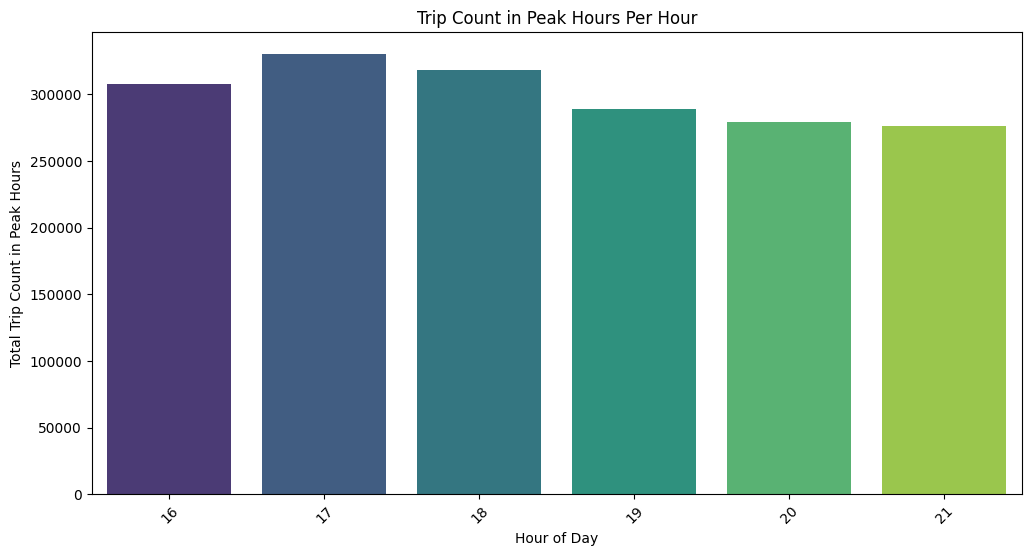

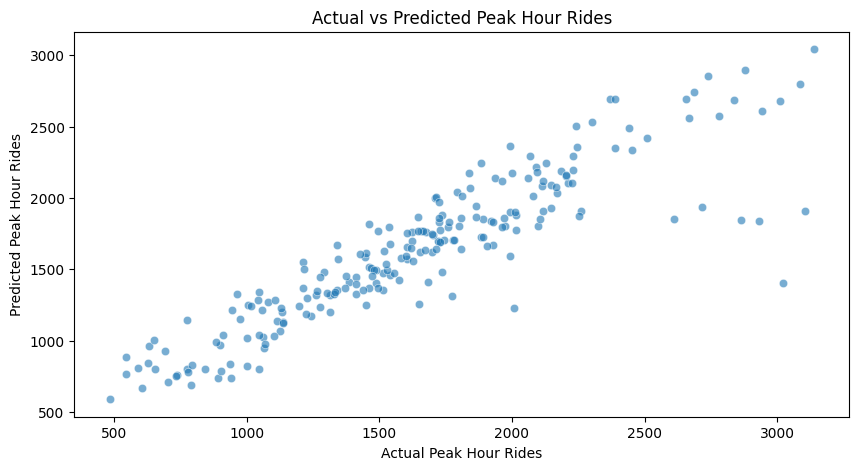

--------- RMSE for peak hour rides -------------
RMSE for Peak Hour Rides Prediction: 254.70
--------- Trips for all hours -------------
--------- RMSE for all hour rides -------------
RMSE: 166.30


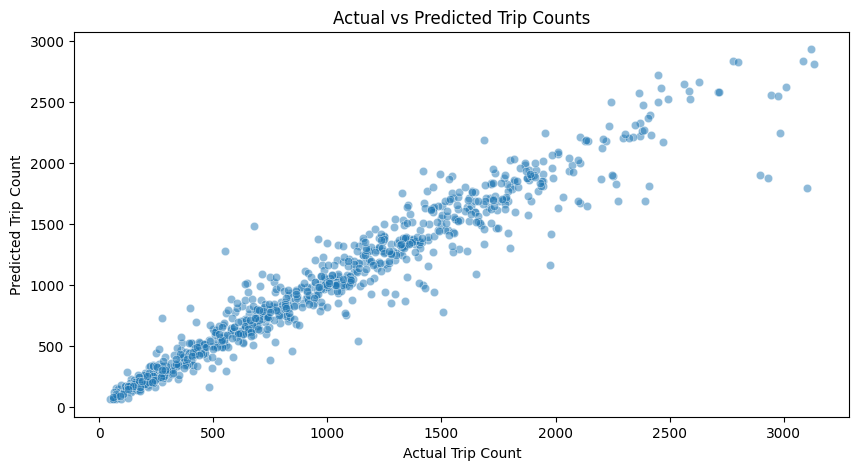

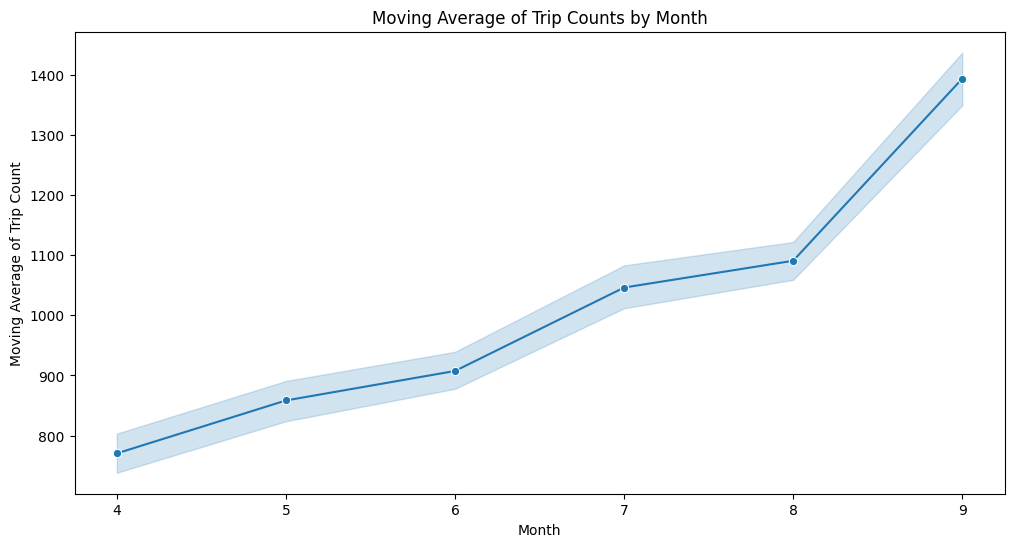

--------- Peak hour trips to Latitude ,Longitude -------------


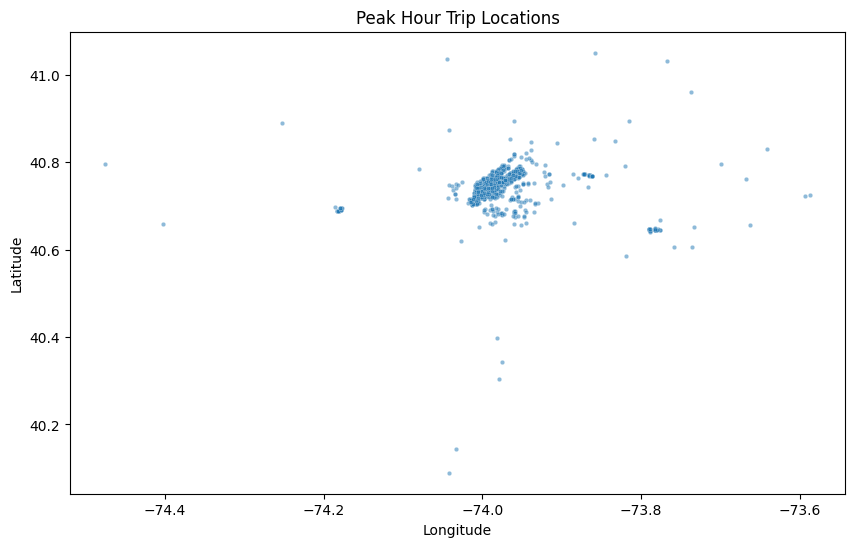

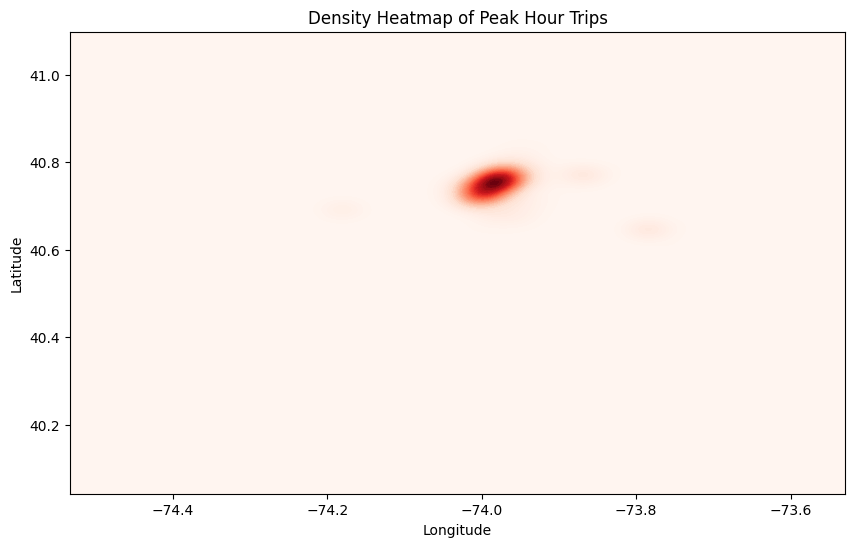

In [88]:
#--------------- Random Forest Regressor----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load cleaned dataset
df_clean = pd.read_csv("/content/sample_data/uber-raw-data-aprsep-14-clean.csv")
df_clean['Date/Time'] = pd.to_datetime(df_clean['Date/Time'])

# Extract features
df_clean['Year'] = df_clean['Date/Time'].dt.year
df_clean['Month'] = df_clean['Date/Time'].dt.month
df_clean['Day'] = df_clean['Date/Time'].dt.day
df_clean['Hour'] = df_clean['Date/Time'].dt.hour
df_clean['Weekday'] = df_clean['Date/Time'].dt.weekday
df_clean['Weekend'] = df_clean['Weekday'] >= 5

# Extract Longitude and Latitude
if 'Lon' in df_clean.columns and 'Lat' in df_clean.columns:
    df_clean['Lon'] = df_clean['Lon']
    df_clean['Lat'] = df_clean['Lat']

# Define target variable (trip count per hour)
df_clean['Trip_Count'] = df_clean.groupby(['Year', 'Month', 'Day', 'Hour'])['Date/Time'].transform('count')

# Drop duplicate time-based entries
df_clean = df_clean.drop_duplicates(subset=['Year', 'Month', 'Day', 'Hour'])

# ----------------COMPUTE PEAK HOURS -------------
# Compute threshold for peak hours
hourly_rides = df_clean.groupby('Hour')['Trip_Count'].sum()
threshold = hourly_rides.mean() + hourly_rides.std()

# Identify peak hours
peak_hours = hourly_rides[hourly_rides > threshold].index.tolist()
print("Identified Peak Hours:", peak_hours)

# Filter dataset for trips during peak hours
peak_hour_data = df_clean[df_clean['Hour'].isin(peak_hours)]

# Plot trip count in peak hours
plt.figure(figsize=(12, 6))
sns.lineplot(data=peak_hour_data, x='Date/Time', y='Trip_Count', marker='o', label="Peak Hours")
plt.xlabel("Date/Time")
plt.ylabel("Trip Count")
plt.title("Trip Count in Peak Hours")
plt.xticks(rotation=45)
plt.legend()
plt.show()

#------------
# Filter dataset for trips during peak hours
peak_hour_data = df_clean[df_clean['Hour'].isin(peak_hours)]

# Group by Month and sum trip counts for peak hours
peak_hour_monthly = peak_hour_data.groupby(['Month', 'Hour'])['Trip_Count'].sum().reset_index()

# Plot trip count in peak hours per month
plt.figure(figsize=(12, 6))
sns.lineplot(data=peak_hour_monthly, x='Month', y='Trip_Count', hue='Hour', marker='o')
plt.xlabel("Month")
plt.ylabel("Trip Count in Peak Hours")
plt.title("Trip Count in Peak Hours Per Month")
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Hour", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



#---------
# Add a 'Week' column based on the Date/Time
df_clean['Week'] = df_clean['Date/Time'].dt.isocalendar().week

# Filter dataset for trips during peak hours
peak_hour_data = df_clean[df_clean['Hour'].isin(peak_hours)]

# Group by Week and sum trip counts for peak hours
peak_hour_weekly = peak_hour_data.groupby(['Week', 'Hour'])['Trip_Count'].sum().reset_index()

# Plot trip count in peak hours per week
plt.figure(figsize=(12, 6))
sns.lineplot(data=peak_hour_weekly, x='Week', y='Trip_Count', hue='Hour', marker='o')
plt.xlabel("Week")
plt.ylabel("Trip Count in Peak Hours")
plt.title("Trip Count in Peak Hours Per Week")
plt.legend(title="Hour", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


#---------

# Add a 'Day' column based on the Date/Time
df_clean['Day'] = df_clean['Date/Time'].dt.dayofyear

# Filter dataset for trips during peak hours
peak_hour_data = df_clean[df_clean['Hour'].isin(peak_hours)]

# Group by Day and sum trip counts for peak hours
peak_hour_daily = peak_hour_data.groupby(['Day', 'Hour'])['Trip_Count'].sum().reset_index()

# Plot trip count in peak hours per day
plt.figure(figsize=(12, 6))
sns.lineplot(data=peak_hour_daily, x='Day', y='Trip_Count', hue='Hour', marker='o')
plt.xlabel("Day of Year")
plt.ylabel("Trip Count in Peak Hours")
plt.title("Trip Count in Peak Hours Per Day")
plt.legend(title="Hour", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


#----------
# Filter dataset for trips during peak hours
peak_hour_data = df_clean[df_clean['Hour'].isin(peak_hours)]

# Group by Hour and sum trip counts for peak hours
peak_hour_hourly = peak_hour_data.groupby('Hour')['Trip_Count'].sum().reset_index()

# Plot trip count in peak hours per hour
plt.figure(figsize=(12, 6))
sns.barplot(data=peak_hour_hourly, x='Hour', y='Trip_Count', palette='viridis')
plt.xlabel("Hour of Day")
plt.ylabel("Total Trip Count in Peak Hours")
plt.title("Trip Count in Peak Hours Per Hour")
plt.xticks(rotation=45)
plt.show()


#----------- Train Model for Peaks hours --------
# Filter dataset for trips during peak hours
peak_hour_data = df_clean[df_clean['Hour'].isin(peak_hours)]

# Define features and target for peak hour rides prediction
features = ['Year', 'Month', 'Day', 'Hour', 'Weekday', 'Weekend', 'Lon', 'Lat']
target = 'Trip_Count'

X_peak = peak_hour_data[features]
y_peak = peak_hour_data[target]

# Split data into train and test sets for peak hour prediction
X_train_peak, X_test_peak, y_train_peak, y_test_peak = train_test_split(X_peak, y_peak, test_size=0.2, random_state=42)

# Train RandomForestRegressor for peak hour rides prediction
rf_model_peak = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_peak.fit(X_train_peak, y_train_peak)

# Make predictions for peak hour rides
y_pred_peak = rf_model_peak.predict(X_test_peak)

# Save actual and predicted values for peak hour rides in a DataFrame
results_peak_df = pd.DataFrame({'Actual': y_test_peak, 'Predicted': y_pred_peak})
results_peak_df.to_csv("/content/sample_data/uber_rf_peak_hour_predictions.csv", index=False)

# Plot actual vs predicted peak hour rides
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test_peak, y=y_pred_peak, alpha=0.6)
plt.xlabel("Actual Peak Hour Rides")
plt.ylabel("Predicted Peak Hour Rides")
plt.title("Actual vs Predicted Peak Hour Rides")
plt.show()

# Calculate RMSE for peak hour rides prediction
print('-----------RMSE for peak hour rides -------------')
rmse_peak = np.sqrt(mean_squared_error(y_test_peak, y_pred_peak))
print(f'RMSE for Peak Hour Rides Prediction: {rmse_peak:.2f}')


#-------------------Trips for all hours---------------------------------

print('--------- Trips for all hours -------------')

# Select features and target for model
features = ['Year', 'Month', 'Day', 'Hour', 'Weekday', 'Weekend', 'Lon', 'Lat']
target = 'Trip_Count'

X = df_clean[features]
y = df_clean[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Save actual and predicted values in a DataFrame
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_csv("/content/sample_data/uber_rf_predictions.csv", index=False)

# Calculate RMSE
print('--------- RMSE for all hour rides -------------')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Trip Count")
plt.ylabel("Predicted Trip Count")
plt.title("Actual vs Predicted Trip Counts")
plt.show()

# Moving Average by Month
df_clean['Rolling_Avg'] = df_clean.groupby('Month')['Trip_Count'].transform(lambda x: x.rolling(7, min_periods=1).mean())

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_clean['Month'], y=df_clean['Rolling_Avg'], marker='o')
plt.xlabel("Month")
plt.ylabel("Moving Average of Trip Count")
plt.title("Moving Average of Trip Counts by Month")
plt.show()

#-------------- Peak hour trips to Latitude ,Longitude ---------
print('--------- Peak hour trips to Latitude ,Longitude -------------')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=peak_hour_data, x='Lon', y='Lat', alpha=0.5, s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Peak Hour Trip Locations")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=peak_hour_data, x='Lon', y='Lat', cmap='Reds', fill=True, thresh=0, levels=50
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Density Heatmap of Peak Hour Trips")
plt.show()



----------- End of Random Forest Regressor Model -------------

#------------- Long Short Term Memory (LSTM) MODEL -------------

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/content/sample_data/uber-raw-data-aprsep-14-clean.csv"
df = pd.read_csv(file_path)

# Convert Date/Time to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract time-based features
df['Hour'] = df['Date/Time'].dt.hour
df['Day'] = df['Date/Time'].dt.day
df['Month'] = df['Date/Time'].dt.month
df['Weekday'] = df['Date/Time'].dt.weekday

# Aggregate data to create a time series of trip demand
df['Count'] = 1  # Each row is a trip, so count them
time_series = df.resample('h', on='Date/Time').sum()['Count'].fillna(0)  # Hourly aggregation

# Normalize data
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series.values.reshape(-1, 1))

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # Using past 24 hours to predict the next hour
X, y = create_sequences(time_series_scaled, seq_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])


# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 24, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0409 - val_loss: 0.0355
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0143 - val_loss: 0.0136
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0103 - val_loss: 0.0106
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0075 - val_loss: 0.0113
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0070 - val_loss: 0.0095
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0061 - val_loss: 0.0055
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0049 - val_loss: 0.0074
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0047 - val_loss: 0.0035
Epoch 9/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 10/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0040 - val_loss: 0.0029
Epoch 11/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 12/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 

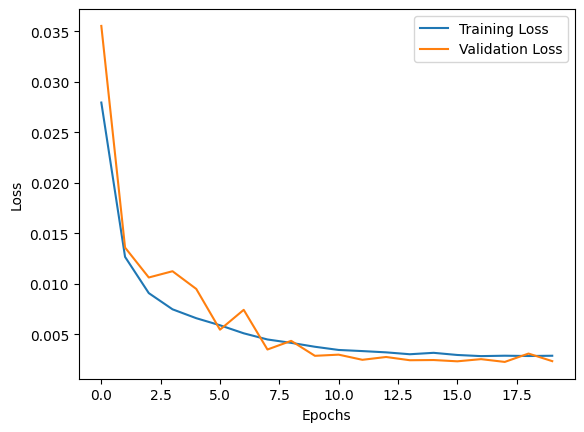

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


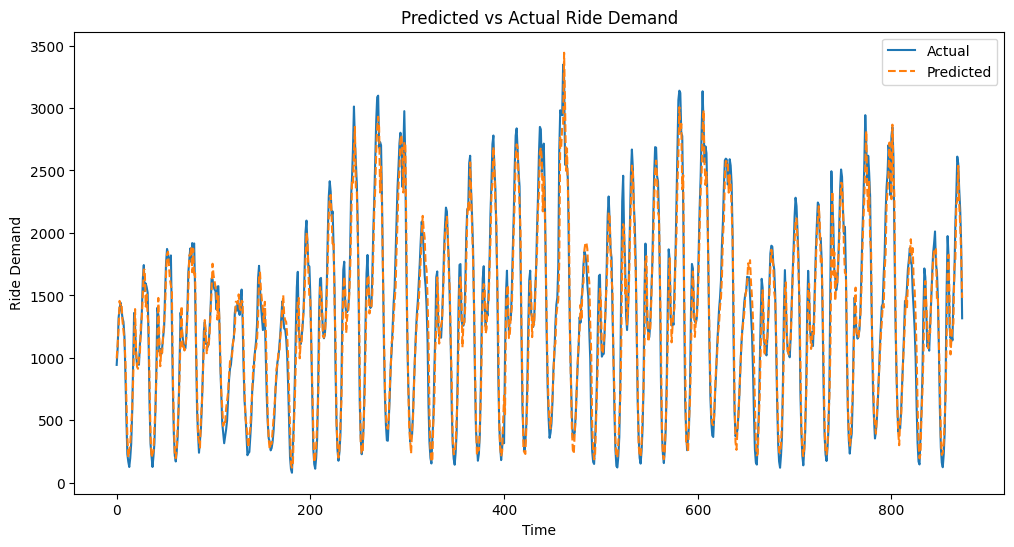

In [90]:

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict and visualize results
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(y_pred_rescaled, label="Predicted", linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Ride Demand')
plt.legend()
plt.title('Predicted vs Actual Ride Demand')
plt.show()


In [91]:
#y_pred = model.predict(X_test)  # Predictions from LSTM
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of LSTM Model: {mse}")


Mean Squared Error of LSTM Model: 0.0023550111335187657


--------------- End of Long Short Term Memory MODEL ---------------------

#-------------------- End of Code --------------------

#Result:

Identified Peak Hours: [16, 17, 18, 19, 20, 21]

1) Long Short Term Memory (LSTM) Model:

   (a) Mean Squared Error: 0.0023550111335187657

2) Random Forest Regressor:

   (a) RMSE for Peak Hour Rides Prediction: 254.70

   (b) RMSE for all hour rides : 166.30




#------------- End of document -----------------